# Unsupervised Learning Exercises
* This notebook was created to try out the exercise questions from `Hands On ML with Scikit-Learn` `Unsupervised Learning` chapter. 

## Import Libraries

In [70]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_olivetti_faces

## Import Data

In [71]:
data_X,data_y = fetch_olivetti_faces(return_X_y=True)

## Explore Data

# Exercise 1
* The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. 
* Each image is flattened to a 1D vector of size 4,096. 
* Forty different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. 
* Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). 
* Since the dataset is quite small, you will probably want to use stratified sampling to ensure that there are the same number of images per person in each set. 
* Next, cluster the images using k-means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). 
* Visualize the clusters: do you see similar faces in each cluster?

In [72]:
data_X.shape,data_y.shape

((400, 4096), (400,))

In [73]:
type(data_X), type(data_y)

(numpy.ndarray, numpy.ndarray)

In [74]:
## lets convert it into DataFrame for easy data exploration
data = pd.DataFrame(data_X, columns=[f"pixel{num}" for num in range(4096)])
print(data.shape)


(400, 4096)


In [75]:
class_data = pd.DataFrame(data_y, columns=["label"])
print(class_data.shape)

(400, 1)


In [76]:
data = pd.concat([data, class_data], axis=1)
print(data.shape)
data.head()

(400, 4097)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,label
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [77]:
data.isna().sum()

pixel0       0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel4092    0
pixel4093    0
pixel4094    0
pixel4095    0
label        0
Length: 4097, dtype: int64

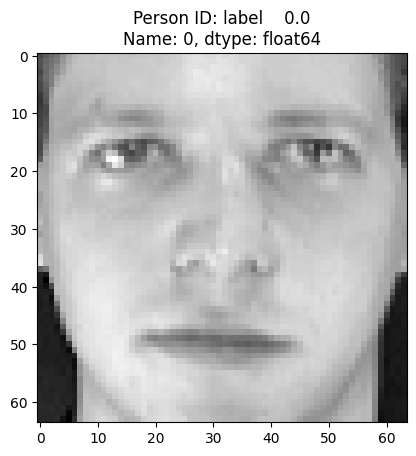

In [78]:
import matplotlib.pyplot as plt

plt.imshow(data.iloc[0,0:4096].values.reshape(64, 64), cmap='gray')
plt.title(f"Person ID: {data.loc[0,["label"]]}")
plt.show()

In [79]:
## just to understand the data let see how many unique labels we have
data["label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

* Ok, so we have 10 labels each and no missing values. For the sake of the exercise, we'll ignore this info, but I wonder having 10 clusters make sense. 
* We know that data is already scaled. 

## Train/Validation/Test Split

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit


ss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(ss.split(data_X,data_y))

train_valid_X = data_X[train_valid_idx]
train_valid_y = data_y[train_valid_idx]

test_X = data_X[train_valid_idx]
test_y = data_y[train_valid_idx]

## split valid again into training datasaet. 

ss = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(ss.split(train_valid_X,train_valid_y))

train_X = train_valid_X[train_idx]
train_y = train_valid_y[train_idx]

valid_X = train_valid_X[valid_idx]
valid_y = train_valid_y[valid_idx]

## Clustering Using KMeans

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=42)

start = time.time()
y_pred = kmeans.fit_predict(train_X)
end = time.time()
print(f"Training took {end - start}s")

Training took 0.06700396537780762s


In [82]:
## we got the labels for each cluster
y_pred.shape

(280,)

In [83]:
np.unique_counts(y_pred)

UniqueCountsResult(values=array([0, 1, 2, 3, 4], dtype=int32), counts=array([31, 78, 49, 65, 57]))

In [84]:
np.argwhere(y_pred == 0)

array([[  1],
       [ 22],
       [ 25],
       [ 32],
       [ 46],
       [ 50],
       [ 57],
       [ 58],
       [ 68],
       [ 84],
       [104],
       [106],
       [108],
       [114],
       [116],
       [130],
       [144],
       [153],
       [162],
       [164],
       [167],
       [173],
       [174],
       [176],
       [187],
       [204],
       [210],
       [229],
       [239],
       [254],
       [274]])

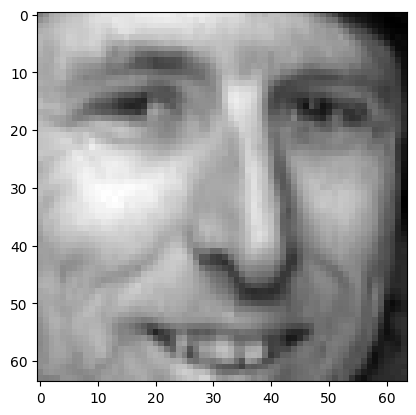

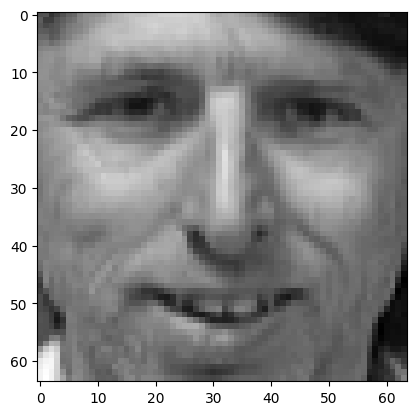

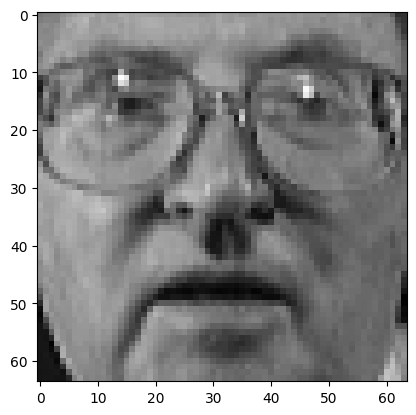

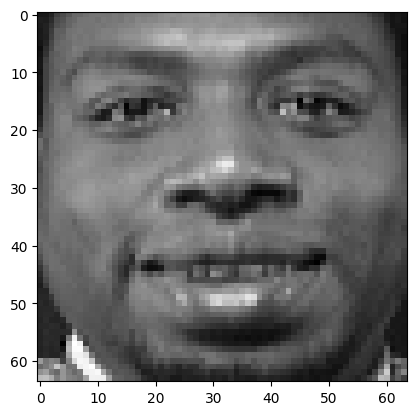

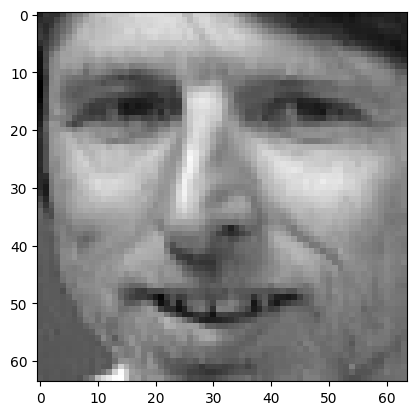

In [85]:
## lets print few images from clusters
cluster_pixels = train_X[np.argwhere(y_pred == 0)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    



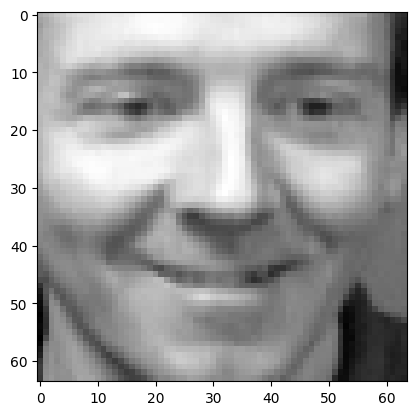

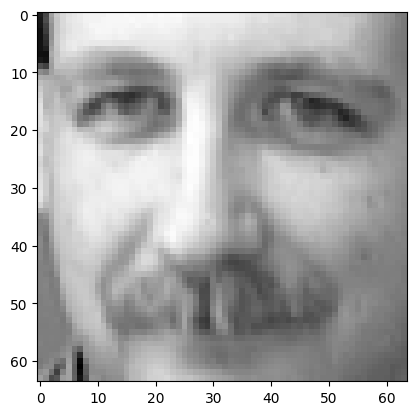

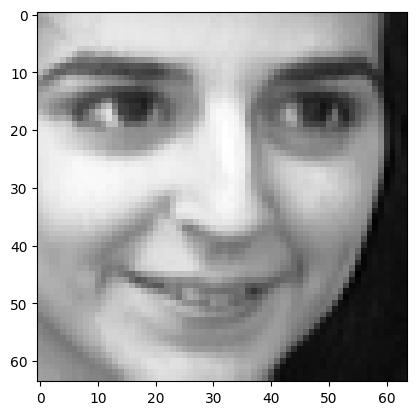

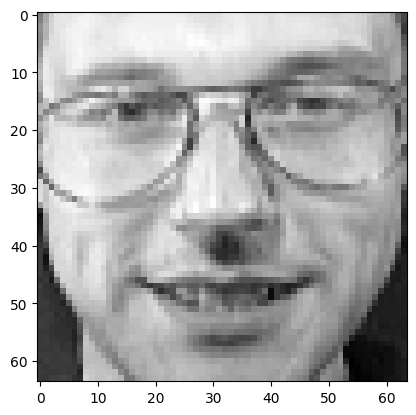

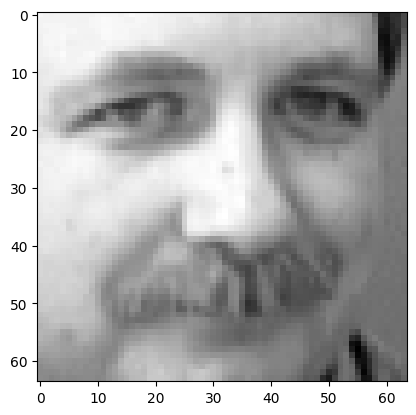

In [86]:
cluster_pixels = train_X[np.argwhere(y_pred == 1)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    


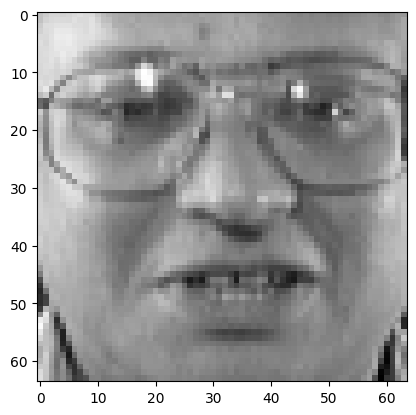

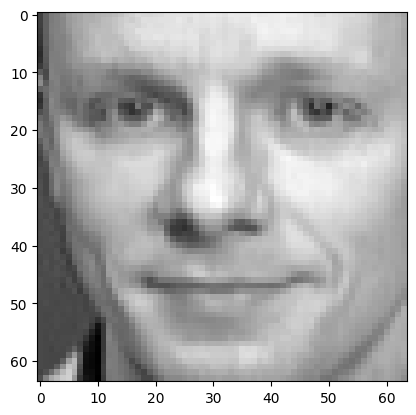

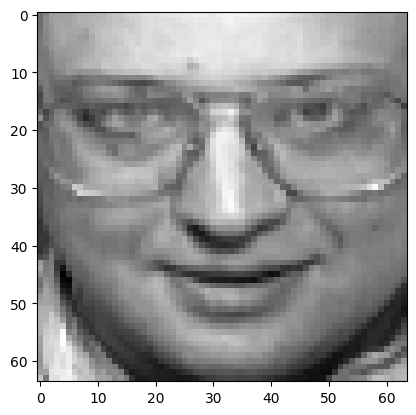

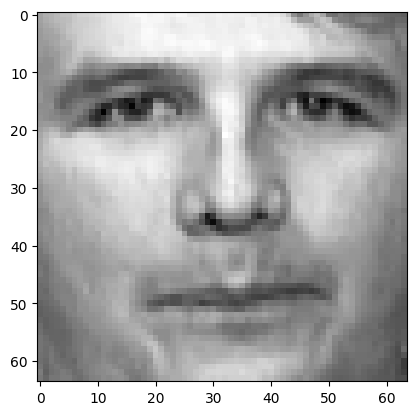

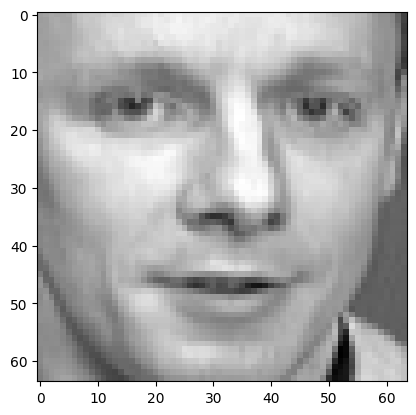

In [87]:
cluster_pixels = train_X[np.argwhere(y_pred == 2)]


for image in cluster_pixels[0:5]:
    plt.imshow(image.reshape(64, 64), cmap='gray')
    # # plt.title(f"Person ID: {data.loc[0,["label"]]}")
    plt.show()    


Observations:
* Interesting, so the clusters are not exactly similar, but I do see some similarity in the images. 
* Lets calculate inertia and silhouette_score and optimize the number of clusters

In [88]:
from sklearn.metrics import silhouette_score
print(kmeans.inertia_)
print(silhouette_score(train_X,kmeans.labels_))

15223.37890625
0.09742064


Observations:
* So silhouette score is close to 0, which means the instances are not assigned to correct cluster in most cases, and instances are in border of clusters. 
* Lets run different clustering models on different number of clusters and see if the numbers improve. 

In [89]:
num_of_clusters = range(5,200,5)
cluster_performance = {
    "cluster_count" : [],
    "silhouette_score" : [],
    "inertia":[],
    "models":[]
}

for cluster_count in num_of_clusters:
    kmeans = KMeans(n_clusters=cluster_count, n_init=10, random_state=42)
    start = time.time()
    y_pred = kmeans.fit_predict(train_X)
    end = time.time()
    print(f"Training took {end - start}s")
    sil_score = silhouette_score(train_X,kmeans.labels_)
    inertia_score = kmeans.inertia_
    cluster_performance["cluster_count"].append(cluster_count)
    cluster_performance["silhouette_score"].append(sil_score)
    cluster_performance["inertia"].append(inertia_score)
    cluster_performance["models"].append(kmeans)

Training took 0.21047520637512207s
Training took 0.28691673278808594s
Training took 0.40718626976013184s
Training took 0.5453999042510986s
Training took 0.65423583984375s
Training took 0.7851991653442383s
Training took 0.9543848037719727s
Training took 1.0382680892944336s
Training took 1.1480841636657715s
Training took 1.3453612327575684s
Training took 1.3927428722381592s
Training took 1.5109057426452637s
Training took 1.6447842121124268s
Training took 1.8126330375671387s
Training took 1.867645025253296s
Training took 1.9937589168548584s
Training took 2.10099196434021s
Training took 2.142807960510254s
Training took 2.2490670680999756s
Training took 2.3579189777374268s
Training took 2.4962501525878906s
Training took 2.59751296043396s
Training took 2.779600143432617s
Training took 2.74820613861084s
Training took 2.87447190284729s
Training took 2.996880054473877s
Training took 3.090420961380005s
Training took 3.2107090950012207s
Training took 3.3270180225372314s
Training took 3.4554848670

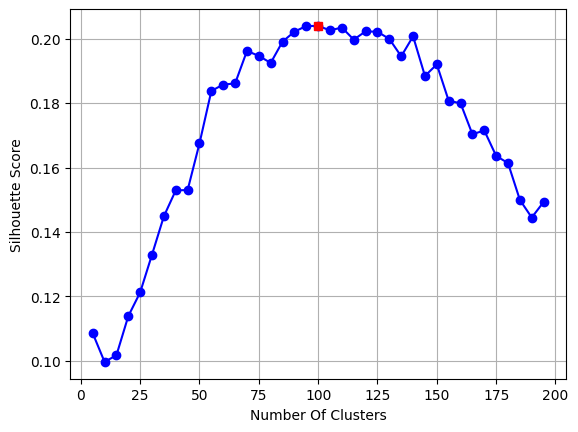

In [90]:
import matplotlib.pyplot as plt
## lets plot to get more info
best_score_idx = np.argmax(cluster_performance["silhouette_score"])
optimum_clusters = cluster_performance["cluster_count"][best_score_idx]
best_score = cluster_performance["silhouette_score"][best_score_idx]

plt.plot(cluster_performance["cluster_count"], cluster_performance["silhouette_score"],"bo-")
plt.xlabel("Number Of Clusters")
plt.ylabel("Silhouette Score")
plt.plot(optimum_clusters,best_score,"rs")
plt.grid()
plt.show()


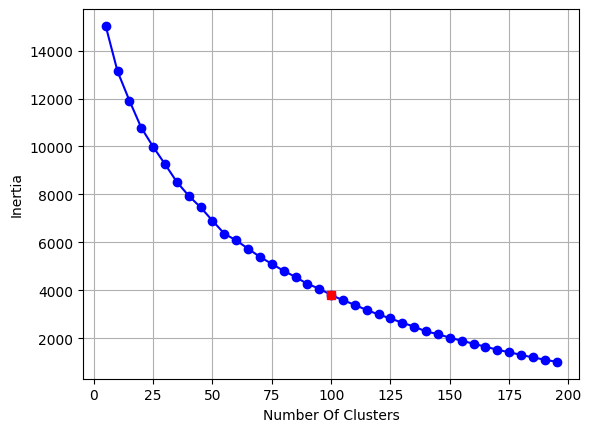

In [91]:
## lets plot inertia the same way
import matplotlib.pyplot as plt
## lets plot to get more info
optimum_clusters = cluster_performance["cluster_count"][best_score_idx]
best_score = cluster_performance["inertia"][best_score_idx]

plt.plot(cluster_performance["cluster_count"], cluster_performance["inertia"],"bo-")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia")
plt.plot(optimum_clusters,best_score,"rs")
plt.grid()
plt.show()


* So `inertia` keeps decreasing even after the best score, this is because as the number of clusters increase the instances will get closer and closer to the centroid. 
* Looking at `Silhouette score` 100 is the optimum number of clusters.
* I actually thought for optimum clusters the score will be closer to one, but its still more closer to 0 than to 1, which tells me we **might** have lot of instances near the border than closer to the centroid. 

Cluster 0


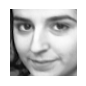

Cluster 1


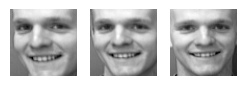

Cluster 2


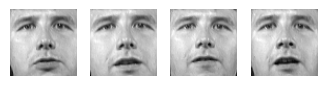

Cluster 3


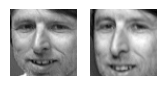

Cluster 4


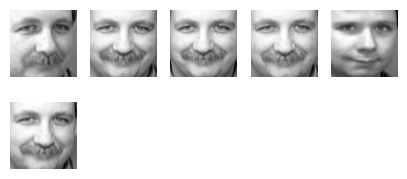

Cluster 5


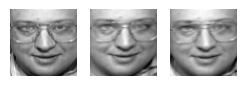

Cluster 6


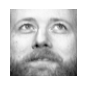

Cluster 7


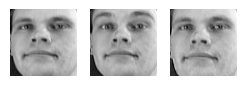

Cluster 8


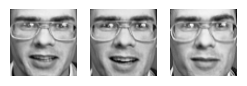

Cluster 9


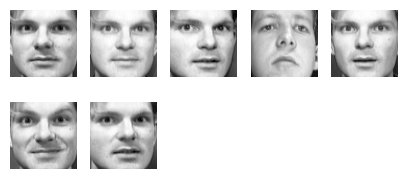

Cluster 10


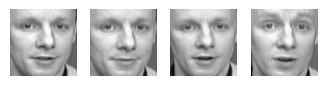

Cluster 11


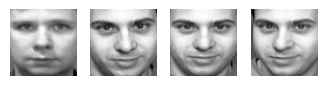

Cluster 12


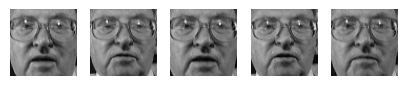

Cluster 13


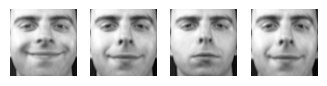

Cluster 14


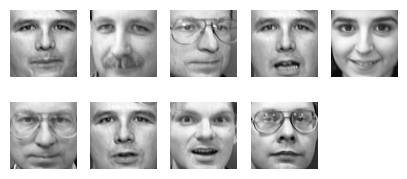

Cluster 15


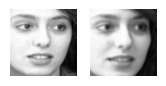

Cluster 16


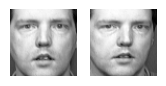

Cluster 17


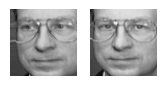

Cluster 18


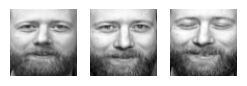

Cluster 19


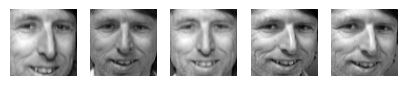

Cluster 20


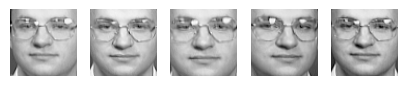

Cluster 21


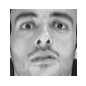

Cluster 22


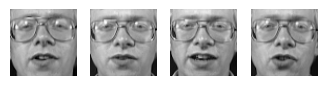

Cluster 23


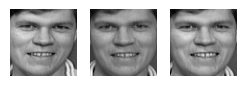

Cluster 24


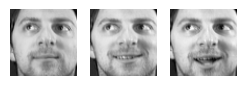

Cluster 25


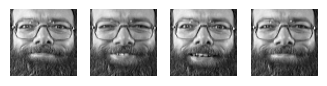

Cluster 26


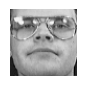

Cluster 27


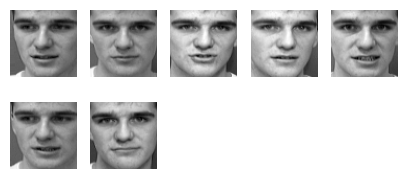

Cluster 28


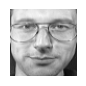

Cluster 29


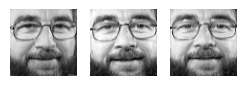

Cluster 30


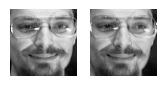

Cluster 31


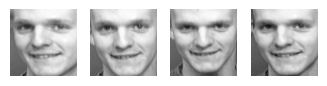

Cluster 32


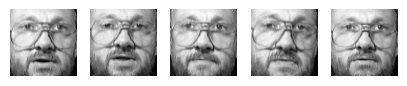

Cluster 33


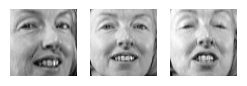

Cluster 34


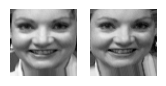

Cluster 35


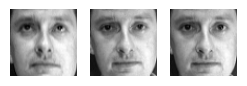

Cluster 36


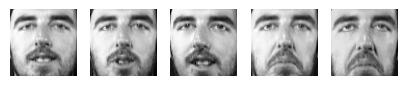

Cluster 37


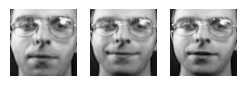

Cluster 38


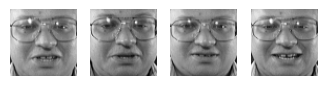

Cluster 39


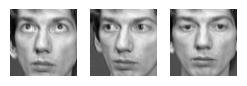

Cluster 40


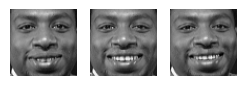

Cluster 41


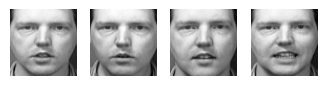

Cluster 42


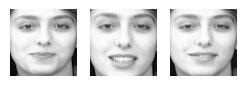

Cluster 43


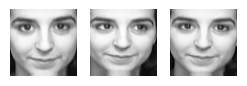

Cluster 44


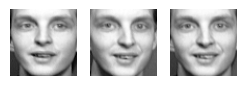

Cluster 45


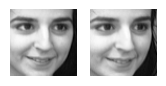

Cluster 46


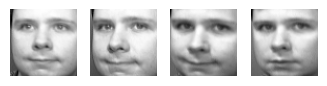

Cluster 47


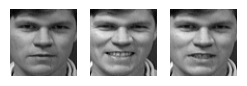

Cluster 48


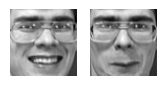

Cluster 49


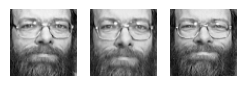

Cluster 50


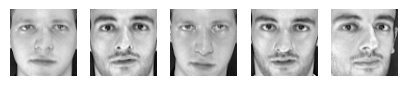

Cluster 51


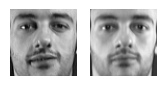

Cluster 52


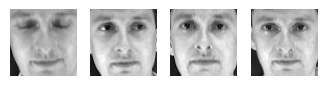

Cluster 53


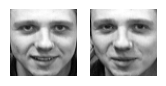

Cluster 54


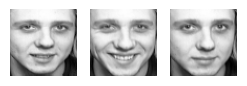

Cluster 55


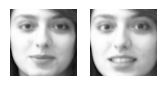

Cluster 56


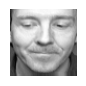

Cluster 57


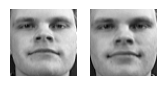

Cluster 58


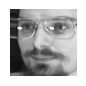

Cluster 59


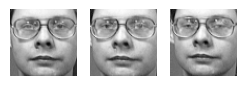

Cluster 60


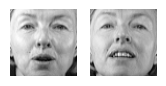

Cluster 61


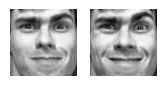

Cluster 62


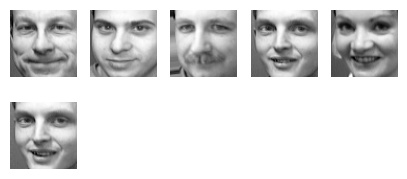

Cluster 63


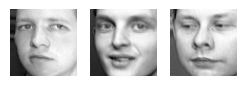

Cluster 64


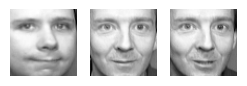

Cluster 65


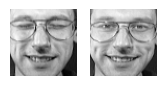

Cluster 66


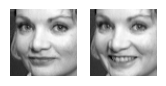

Cluster 67


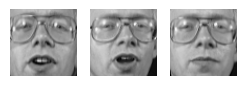

Cluster 68


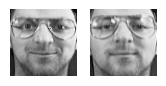

Cluster 69


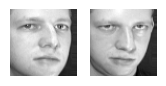

Cluster 70


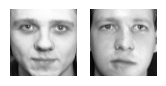

Cluster 71


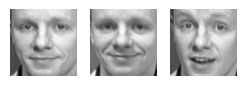

Cluster 72


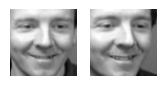

Cluster 73


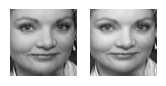

Cluster 74


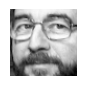

Cluster 75


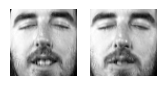

Cluster 76


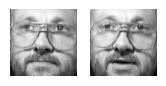

Cluster 77


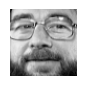

Cluster 78


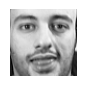

Cluster 79


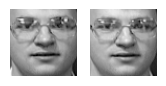

Cluster 80


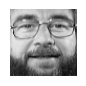

Cluster 81


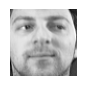

Cluster 82


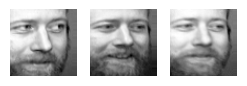

Cluster 83


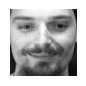

Cluster 84


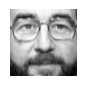

Cluster 85


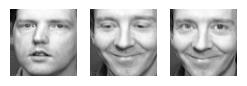

Cluster 86


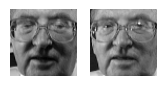

Cluster 87


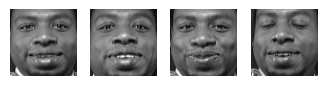

Cluster 88


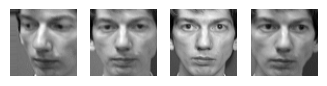

Cluster 89


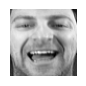

Cluster 90


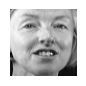

Cluster 91


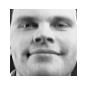

Cluster 92


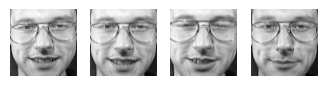

Cluster 93


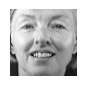

Cluster 94


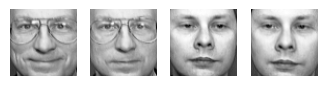

Cluster 95


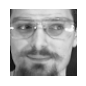

Cluster 96


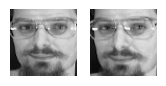

Cluster 97


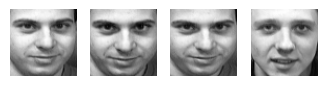

Cluster 98


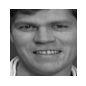

Cluster 99


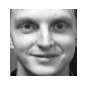

In [92]:
best_model = cluster_performance["models"][best_score_idx]
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces)) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        # plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = train_X[in_cluster]
    labels = train_y[in_cluster]
    plot_faces(faces, labels)

Observations:
* This is mind bending and interesting for following reasons,
    * Orinally I had an intuition that since there are 40 unique faces a cluster size of 40 would make sense.
    * But even with 100 clusters I see the most of the clusters have strongly similar faces. 
    * After careful analysis its easy to say that face belongs to different person, but the visual similarity is mind blowing. 

# Exercise 2

* Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. 
* Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set.
* Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? 
* What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

## Training Base SVC

In [93]:
## using SVC to classify the images
from sklearn.svm import SVC


svc = SVC(kernel="rbf", random_state=42)

start = time.time()
svc.fit(train_X,train_y)
end = time.time()

print(f"time taken to train svn {end - start}s")

time taken to train svn 0.05814814567565918s


In [94]:
## checking the score
svc.score(valid_X,valid_y)

0.9375

## Training Base RandomForestClassifier

In [95]:
## similar lets train one with random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rfc.fit(train_X,train_y)
end = time.time()

print(f"time taken to train RFC {end-start}s")

time taken to train RFC 1.355315923690796s


In [96]:
rfc.score(valid_X,valid_y)

0.9125

In [97]:
## lets apply clustering algorithm with optimal clusters

kmeans = KMeans(n_clusters=100, random_state=42)

start = time.time()
kmeans.fit(train_X,train_y)
end = time.time()

print(f"time taken to train KMeans {end-start}s")


time taken to train KMeans 0.23232269287109375s


In [98]:
silhouette_score(train_X, kmeans.labels_)

np.float32(0.19977014)

## KMeans Dimensionality Reduction

In [99]:
train_X.shape

(280, 4096)

* Original dimensions are 280,4096

In [100]:
## dimentionality reduction
## the `transform` returns distance of each instance from all the clusters 
# and so reduces the number of features to number of clusters
train_X_reduced = kmeans.transform(train_X)
train_X_reduced.shape

(280, 100)

* Since our optimal number of cluster is 100 we now have 100 features in our training set
* Lets sample first 5 rows and see.

In [101]:
train_X_reduced[0:5]

array([[11.245399 , 10.682305 , 13.924817 , 14.032393 , 11.516829 ,
        14.482371 , 12.744799 ,  9.539544 , 10.530308 , 13.419996 ,
        16.720528 , 12.845236 , 15.434103 , 11.859709 , 11.855041 ,
        11.39     , 16.151957 , 11.575153 , 13.126708 ,  9.851714 ,
        12.603003 , 10.676619 , 10.219692 , 15.782655 , 10.475167 ,
        13.049573 , 14.805373 ,  9.7994995, 12.268757 , 12.842252 ,
        15.705808 , 11.813485 , 14.78857  , 14.873777 , 12.374066 ,
         3.868539 , 16.782305 , 16.034977 , 11.151138 , 14.217008 ,
        12.981773 , 12.751358 , 11.186569 , 12.072899 ,  9.728608 ,
        12.691106 , 13.860851 , 11.920589 , 12.496392 , 14.2554865,
        15.946707 , 12.89222  , 13.362806 , 14.031231 , 11.508381 ,
        12.344568 , 10.606283 , 12.249071 , 12.486287 , 12.879793 ,
        10.79119  , 12.504483 , 15.861017 , 16.336273 ,  9.800785 ,
        11.541311 , 11.4586935, 14.5773325, 11.987211 ,  9.876767 ,
        11.989322 , 14.005815 , 12.188417 , 14.9

* So each column is a distance of a particular instance from the respective cluster.
* One thing to notice is this is not scaled so we'll need to scale it before training SVC

## Training SVC on Reduced Dataset

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X_reduced)

svc = SVC(kernel="rbf", random_state=42)

start = time.time()
svc.fit(train_X_scaled, train_y)
end = time.time()

print(f"time taken to train svc {end - start}s")

time taken to train svc 0.01191401481628418s


In [103]:
valid_X_reduced = kmeans.transform(valid_X)
valid_X_scaled = scaler.fit_transform(valid_X_reduced)
svc.score(valid_X_scaled,valid_y)

0.3625

Observations:
* So the performance dramatically dropped after dimensionality reduction. 
* This makes sense because 
    * The way SVC works is it tries to create a decision boudry between different classes. In our case the decision bountry should run between different clusters. 
    * Our `silhouette score` is `~0.2` which indicates our clusters will have many instances on the border, and so we **might** not have a clear decision boundry that distributes the classes accurately.  
* Another reasons could be, 
    * KMeans is unsupervised — it clusters data based on feature similarity, not class labels.
	* If the clusters don’t align with class boundaries, then you’re throwing away class-discriminative features.

## Training RandomForestClassifier on Reduced Dataset

In [104]:
## lets train rfc with reduced dataset
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rfc.fit(train_X_reduced, train_y)
end = time.time()

print(f"time taken to train rfc {end - start}s")


time taken to train rfc 0.30550599098205566s


In [105]:
rfc.score(valid_X_reduced,valid_y)

0.8375

Observations:
* Interestingly even the RFC performance dropped from .91 to .83.
* This tells us our clusters do not align with our class boundries. And since our `silhouette score` is 0.2 even the clusters are not too tightly separated, which might make RFC decision boundries more blurry and noisy. 
* We are also reducting the number of features from 4096 to 100, which means we could be losing a lot of diverse, rich information on which RFC relies for training better models. 

## Extending Dataset

In [106]:
print(train_X.shape, train_X_reduced.shape)
print(valid_X.shape, valid_X_reduced.shape)

(280, 4096) (280, 100)
(80, 4096) (80, 100)


In [107]:
## combinding the dataset
train_X_extended = np.concatenate((train_X, train_X_reduced), axis=1)
## we need scaled version of extended data for SVC
train_X_extended_scaled = np.concatenate((train_X, train_X_scaled), axis=1)

valid_X_extended = np.concatenate((valid_X, valid_X_reduced), axis=1)
valid_X_extended_scaled = np.concatenate((valid_X, valid_X_scaled), axis=1)

train_X_extended.shape, valid_X_extended.shape,train_X_extended_scaled.shape,valid_X_extended_scaled.shape

((280, 4196), (80, 4196), (280, 4196), (80, 4196))

## Training SVC on Extended Dataset

In [108]:
svc = SVC(kernel="rbf", random_state=42)

start = time.time()
svc.fit(train_X_extended_scaled,train_y)
end = time.time()

print(f"time taken to train svn {end - start}s")

time taken to train svn 0.12418317794799805s


In [109]:
svc.score(valid_X_extended_scaled,valid_y)

0.9375

Observations:
* Interesting, we see some improvement in the score from reduced dataset,but the score is more or less similar to the base model. No improvement compared to that. 
* Which tells me for SVN the reduced features do not add any value, and the improved performance is due to base data in the extended dataset.

## Training RFC on Extended Dataset

In [110]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rfc.fit(train_X_extended,train_y)
end = time.time()

print(f"time taken to train RFC {end-start}s")

time taken to train RFC 1.3925609588623047s


In [111]:
rfc.score(valid_X_extended,valid_y)

0.9375

Observations:
* Finally we see a ~`2%` improvement compared to the base model. I have a feeling that if we see feature importance extended features might not have significant contribution to the model

In [112]:
## lets name the features and try to quickly analyze feature importance
train_X_df = pd.DataFrame(train_X, columns=[f"pixel{idx}" for idx in range(train_X.shape[1])])
train_X_reduced_df = pd.DataFrame(train_X_reduced, columns=[f"reduced{idx}" for idx in range(train_X_reduced.shape[1])])

train_X_extended_df = pd.concat([train_X_df, train_X_reduced_df], axis=1)

In [113]:
train_X_extended_df.shape

(280, 4196)

In [114]:
train_X_extended_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,reduced90,reduced91,reduced92,reduced93,reduced94,reduced95,reduced96,reduced97,reduced98,reduced99
0,0.702479,0.743802,0.772727,0.772727,0.764463,0.772727,0.793388,0.805785,0.789256,0.793388,...,12.042513,15.068158,12.645258,14.680010,15.851335,10.529409,15.030951,12.296964,11.604277,12.716977
1,0.355372,0.392562,0.446281,0.462810,0.475207,0.491736,0.500000,0.504132,0.520661,0.545455,...,6.966775,16.556274,17.188721,18.474091,15.947061,9.102397,17.541069,14.373736,13.642268,13.448921
2,0.330579,0.409091,0.549587,0.599174,0.619835,0.607438,0.623967,0.665289,0.702479,0.752066,...,20.193693,15.466876,13.187521,11.535563,13.494838,17.336388,10.463063,13.756497,12.796937,15.737142
3,0.231405,0.223140,0.206612,0.206612,0.198347,0.181818,0.219008,0.223140,0.231405,0.318182,...,17.563904,14.476912,12.302142,12.191289,13.682981,15.054980,11.284155,12.823514,12.765894,14.749331
4,0.227273,0.322314,0.396694,0.409091,0.442149,0.491736,0.512397,0.524793,0.545455,0.541322,...,10.869955,15.223729,14.534831,14.151970,11.908963,7.189097,12.537076,10.717237,12.193638,11.895924


In [115]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start = time.time()
rfc.fit(train_X_extended_df,train_y)
end = time.time()

print(f"time taken to train RFC {end-start}s")

time taken to train RFC 1.3751568794250488s


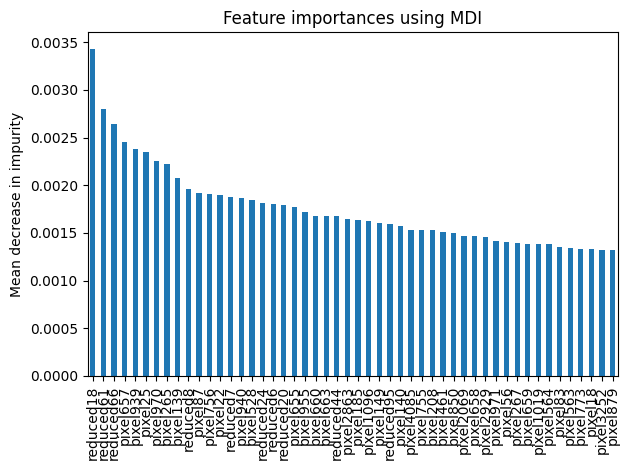

In [127]:
top50 = pd.Series(rfc.feature_importances_, index=train_X_extended_df.columns).sort_values(ascending=False)[:50]
fig, ax = plt.subplots()
top50.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Observations:
* So we do see some `reduced dimensions` in feature importance, it is surprising to see top 3 important features are the reduced dimensions. 
* This tells us that these reduced features might help refine the classification bounries and might be capturing some info that base dataset is not.